**Avec réentrainement**

entrainement pour detecter si c une pomme, une cerise ou une orange

fait avec le dataset de 1000 image par element (1432 en vrai 

 test=290 train=1000 validation =142)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#os.chdir("/content/gdrive/MyDrive/fruitsPommeCeriseOrange")  #sert a définir le chemin ou le dossier de travail dans google drive. 
#sys.path.append("/content/gdrive/MyDrive/fruitsPommeCeriseOrange") #sert a définir le chemin ou le dossier de travail dans google drive. 

#!cp -r <'PATH_TO_PNG_FOLDER'> /content/gdrive/My Drive/    #sa ne marche tentative regler probleme dajout dimage des video dans le Drive https://datascience.stackexchange.com/questions/64131/how-to-save-dynamic-files-from-colab-to-google-drive

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt


import numpy as np
import os
import PIL

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
img_height, img_width = 32, 32   #il faut que les deux nombre soit egal pour faire des image carrer
                       #je crois que c la taille qui va mettre nos image pour lentrainement
                       #plus le nombre est gros plus sa  peut donner des modele precis mais c plus lourd a entrainer  (je crois a verifier si c vraiment sa) 

batch_size = 20    # cest le nombre dimage quon va envoyer a notre modele en meme temps
                   #en gros pour optimiser le modele au lieux denvoyer une image a la fois on en envoir 20 dans cette exemple

train_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/fruitsPommeCeriseOrange4/train",
   # "fruitsPommeCeriseOrange/train",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
#je coit quon peut ajouter aussi les methode prefaite 
#data_dir     yer deja la dans lexemple le data directory c le  "/content/drive/MyDrive/fruitsPommeCeriseOrange3/train",
#validation_split  = 0.2,
#subset = "training",
#seed=42,
#en plus de ceux deja present comme dans lexemple image_size = (img_height, img_width),  et    batch_size = batch_size

val_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/fruitsPommeCeriseOrange4/validation",
   # "fruitsPommeCeriseOrange/validation",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/fruitsPommeCeriseOrange4/test",
    #"fruitsPommeCeriseOrange/test",
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 3000 files belonging to 3 classes.
Found 426 files belonging to 3 classes.
Found 870 files belonging to 3 classes.


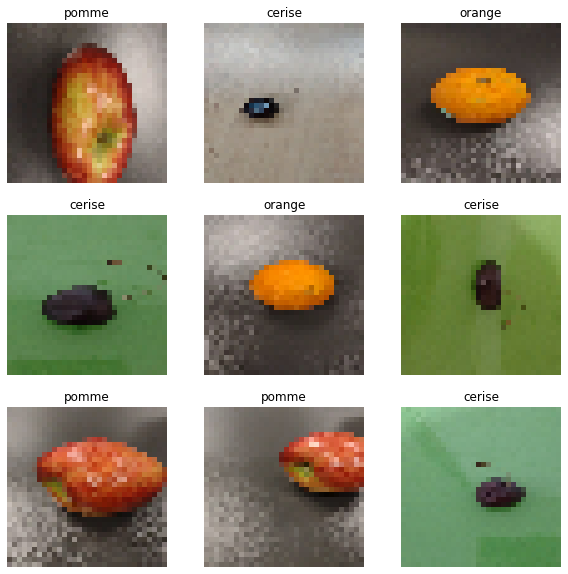

In [ ]:
class_names = ["cerise", "orange", "pomme"]
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
num_classes = len(class_names)

model = tf.keras.Sequential(
    [
     tf.keras.layers.Rescaling(1./255),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(128, activation="relu"),
     tf.keras.layers.Dense(3)
    ]
)

In [ ]:
model.compile(
    optimizer="adam",
    #loss=tf.losses.SparseCategoricalCrossentropy(from_logits = True),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [ ]:
epochs=100  #etait a 10
hist = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs=epochs
)

Epoch 1/100
150/150 [==============================] - 230s 2s/step - loss: 0.3227 - accuracy: 0.8773 - val_loss: 0.3621 - val_accuracy: 0.8545
Epoch 2/100
150/150 [==============================] - 51s 329ms/step - loss: 0.0142 - accuracy: 0.9977 - val_loss: 0.1746 - val_accuracy: 0.9765
Epoch 3/100
150/150 [==============================] - 49s 313ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.1868 - val_accuracy: 0.9789
Epoch 4/100
150/150 [==============================] - 45s 288ms/step - loss: 6.8264e-04 - accuracy: 1.0000 - val_loss: 0.2109 - val_accuracy: 0.9765
Epoch 5/100
150/150 [==============================] - 45s 290ms/step - loss: 3.5960e-04 - accuracy: 1.0000 - val_loss: 0.2292 - val_accuracy: 0.9789
Epoch 6/100
150/150 [==============================] - 47s 303ms/step - loss: 2.2846e-04 - accuracy: 1.0000 - val_loss: 0.2341 - val_accuracy: 0.9789
Epoch 7/100
150/150 [==============================] - 45s 292ms/step - loss: 1.4850e-04 - accuracy: 1.0000 - val_

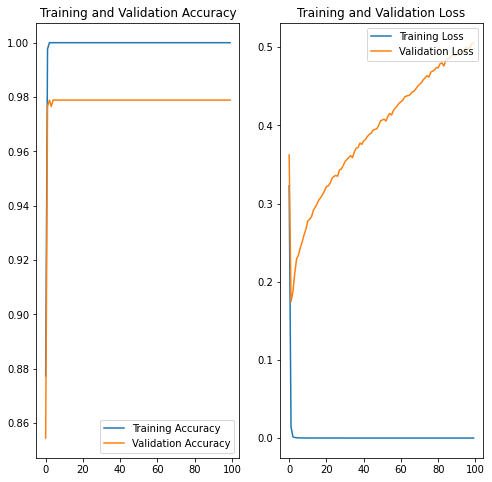

In [ ]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Augmentation des données**

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

Visualisons à quoi ressemblent quelques exemples augmentés en appliquant plusieurs fois l'augmentation de données à la même image :

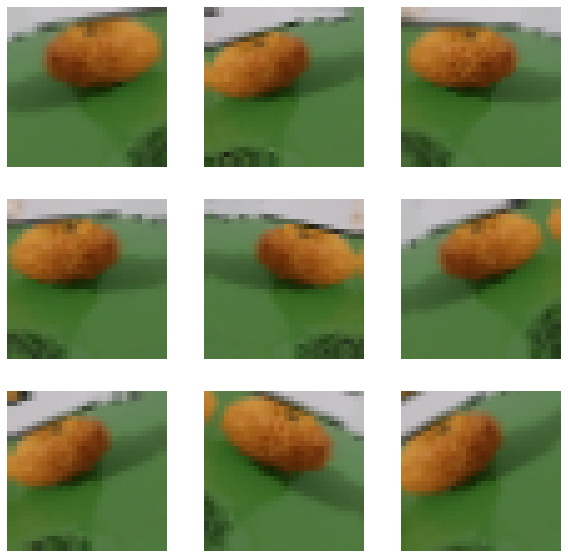

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

**Abandonner**

Une autre technique pour réduire le surajustement consiste à introduire une régularisation des abandons dans le réseau.

Lorsque vous appliquez une suppression à une couche, elle supprime de manière aléatoire (en définissant l'activation sur zéro) un certain nombre d'unités de sortie de la couche pendant le processus d'apprentissage. L'abandon prend un nombre fractionnaire comme valeur d'entrée, sous la forme de 0,1, 0,2, 0,4, etc. Cela signifie abandonner 10 %, 20 % ou 40 % des unités de sortie au hasard de la couche appliquée.

Créons un nouveau réseau de neurones avec tf.keras.layers.Dropout avant de l'entraîner à l'aide des images augmentées :

In [ ]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

**Compiler et entraîner le modèle**

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 32, 32, 3)         0         
                                                                 
 rescaling_1 (Rescaling)     (None, 32, 32, 3)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                  

In [ ]:
epochs = 30  #etait a 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30


150/150 [==============================] - 59s 336ms/step - loss: 0.2688 - accuracy: 0.8930 - val_loss: 0.0982 - val_accuracy: 0.9742
Epoch 2/30
150/150 [==============================] - 46s 299ms/step - loss: 0.0182 - accuracy: 0.9950 - val_loss: 0.0483 - val_accuracy: 0.9859
Epoch 3/30
150/150 [==============================] - 46s 300ms/step - loss: 0.0156 - accuracy: 0.9950 - val_loss: 0.0835 - val_accuracy: 0.9742
Epoch 4/30
150/150 [==============================] - 47s 301ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0389 - val_accuracy: 0.9836
Epoch 5/30
150/150 [==============================] - 47s 304ms/step - loss: 2.2375e-04 - accuracy: 1.0000 - val_loss: 0.0370 - val_accuracy: 0.9812
Epoch 6/30
150/150 [==============================] - 46s 299ms/step - loss: 2.4918e-04 - accuracy: 1.0000 - val_loss: 0.0477 - val_accuracy: 0.9789
Epoch 7/30
150/150 [==============================] - 46s 300ms/step - loss: 2.0600e-04 - accuracy: 1.0000 - val_loss: 0.0865 - val_a

**Visualisez les résultats de l'entraînement**

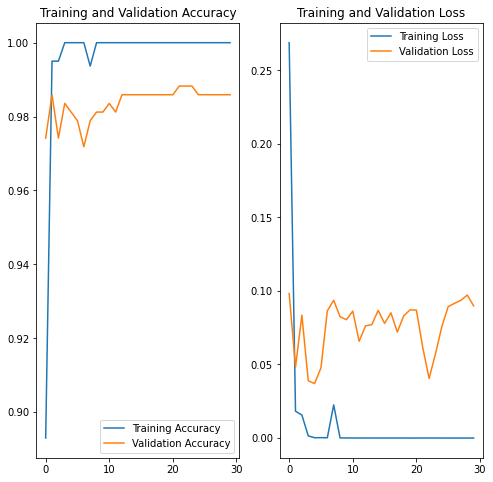

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model.evaluate(test_ds)

44/44 [==============================] - 85s 2s/step - loss: 1.1115e-04 - accuracy: 1.0000


[0.0001111543970182538, 1.0]

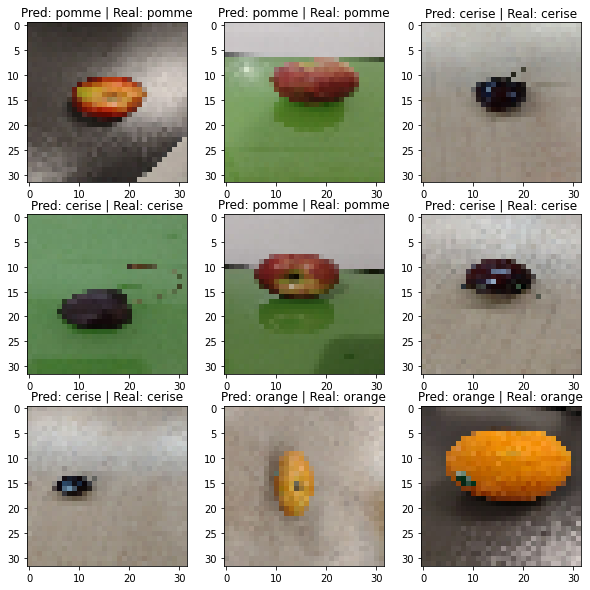

In [ ]:
import numpy

plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
  classifications = model(images)
  # print(classifications)
  
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])

conversion du model en model tensorflow lite pour une utilisation sur android

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("modelPommeCeriseAugmenter2.tflite", 'wb') as f:
  f.write(tflite_model)